# Salário Mínimo Necessário

### O que é o salário mínimo?

Salário Mínimo é o valor mínimo que um trabalhador e trabalhadora deve receber por mês para garantir sua sobrevivência. Esse valor é estipulado pelo governo através de leis, e costuma variar de acordo com o custo de vida da população. É preciso destacar porém, que muitos trabalhadores não recebem sequer o valor mínimo para sua sobrevivência.

De acordo com o decreto-lei 399 de 30 de abril de 1938:

Art. 2º Denomina-se salário mínimo a remuneração mínima devida a todo trabalhador adulto, sem distinção de sexo, por dia normal de serviço e capaz de satisfazer, em determinada época, na "região do país, as suas necessidades normais de alimentação, habitação, vestuário, higiene e transporte.

### O que é o salário mínimo necessário?

De acordo com o DIEESE, o salário mínimo necessário:

"A constituição, promulgada em 5 de outubro de 1988, define o salário mínimo como aquele fixado em lei, nacionalmente unificado, capaz de atender às suas necessidades vitais básicas (do trabalhador) e às de sua família com moradia, alimentação, educação, saúde, lazer, vestuário, higiene, transporte e previdência social, com reajustes periódicos que lhe preservem o poder aquisitivo. (Constituição Federativa do Brasil, art. 7" - IV).

Para calcular o Salário Mínimo Necessário, o DIEESE considera o preceito constitucional de que o salário mínimo deve atender as necessidades básicas do trabalhador e de sua família e cujo valor é único para todo o país. Usa como base o Decreto lei nº 399, que estabelece que o gasto com alimentação de um trabalhador adulto não pode ser inferior ao custo da Cesta Básica de Alimentos. "

Utilizando-se o custo da maior cesta (CC = Custo da Cesta Básica de maior valor), dentre as 27 capitais que pesquisam a Cesta Básica de Alimentos e multiplicando-se por 3, obtém-se o gasto alimentar de uma família (CFA = Custo Familiar de Alimentação).

A família considerada para o cálculo é composta por 2 adultos e 2 crianças, que por hipótese, consomem como 1 adulto, por isso 3.

CFA = 3*CC

O Dieese definiu que 35,71% do orçamento familiar é para os gastos com alimentação (CFA), e o restante do orçamento é para despesas como habitação, vestuário, transporte etc.

> Referências
- [DIEESE - Salário mínimo nominal e necessário](https://www.dieese.org.br/analisecestabasica/salarioMinimo.html)
- [DIEESE - Metodologia da Pesquisa Nacional da Cesta Básica de Alimentos](https://www.dieese.org.br/metodologia/metodologiaCestaBasica2016.pdf)

E os dados?

Bom, os dados ficam numa tabela HTML e não há um botão para fazer download, portanto, nesse caso precisaremos de um scrapy!

### Bibliotecas 

In [2]:
import scrapydo
scrapydo.setup()
from scrapydo.utils import highlight
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
#sns.set(style="darkgrid")

%matplotlib inline

### Definir a URL

In [3]:
url = "https://www.dieese.org.br/analisecestabasica/salarioMinimo.html"
response = scrapydo.fetch(url)

if(response.status == 200):
    print(response)
else:
    print("URL com problema")

<200 https://www.dieese.org.br/analisecestabasica/salarioMinimo.html>


### Extrair dados e criar um dataframe

Estrutura da tabela em https://www.dieese.org.br/analisecestabasica/salarioMinimo.html

```html
<div id="conteudo">
    ...
	<table rules="all">
		<tbody>
			<tr class="subtitulo">
				<td colspan="3">
					<a name="2020">2020</a>
				</td>
			</tr>
			<tr class="listra">
				<td>Fevereiro</td>
				<td>1.039,00</td>
				<td>4.366,51</td>
			</tr>
			<tr>
				<td>Janeiro</td>
				<td>1.039,00</td>
				<td>4.347,61</td>
			</tr>
			<tr class="subtitulo">
				<td colspan="3">
					<a name="2019">2019</a>
				</td>
			</tr>
			<tr class="listra">
				<td>Dezembro</td>
				<td>998,00</td>
				<td>4.342,57</td>
			</tr>
			...
		</tbody>
	</table>
</div>
``` 

A ideia é montar um dataframe com as colunas: [ANO, MES, SM, SMN]

In [4]:
table_result = []

for rows in response.css('table > tbody > tr'):
    if(rows.css('.subtitulo a::text').extract() != []):
        ano = rows.css('.subtitulo a::text').extract()[0]
    if(rows.css('td::text').extract() != []):
        tr_row = rows.css('td::text').extract()
        tr_row = np.insert(tr_row, 0, ano, axis=0)
        table_result.append(tr_row)

In [5]:
dieese_dados = pd.DataFrame(table_result, columns=['ANO', 'MES_NOME', 'SM', 'SMN'])

In [6]:
dieese_dados

,ANO,MES_NOME,SM,SMN
0,2020,Fevereiro,"R$ 1.045,00","R$ 4.366,51"
1,2020,Janeiro,"R$ 1.039,00","R$ 4.347,61"
2,2019,Dezembro,"R$ 998,00","R$ 4.342,57"
3,2019,Novembro,"R$ 998,00","R$ 4.021,39"
4,2019,Outubro,"R$ 998,00","R$ 3.978,63"
...,...,...,...,...
303,1994,Novembro,"R$ 70,00","R$\n744,25\n"
304,1994,Outubro,"R$ 70,00","R$ 740,83\n"
305,1994,Setembro,"R$ 70,00","R$ 695,64\n"
306,1994,Agosto,"R$ 64,79","R$ 645,53\n"


### Tratar dados

Agora que temos nosso dataframe, vamos ter que dar uma tratada nos dados:

- Podemos até manter as colunas ANO e MES_NOME, mas criaremos um índice que seja um timeserie, para isso, teremos que converter os nomes dos meses em valores numéricos referente aos meses;
- Os números estão em formato texto e com caracteres inválidos, temos que limpar os valores e converter em float.

In [7]:
#dieese_dados.dtypes
dieese_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 4 columns):
ANO         308 non-null object
MES_NOME    308 non-null object
SM          308 non-null object
SMN         308 non-null object
dtypes: object(4)
memory usage: 9.8+ KB


Para converter os meses, vamos criar um dict com os nomes dos meses como chave, e os números como valor. Na função quando a chave for encontrada, o valor dela será atribuído para a coluna MES do dataframe.

In [8]:
meses = {
    'Janeiro': '01', 'Fevereiro': '02', 'Março': '03', 'Abril': '04', 'Maio':'05', 'Junho':'06', 'Julho':'07', 'Agosto':'08', 'Setembro':'09', 'Outubro':'10', 'Novembro':'11', 'Dezembro':'12'
}

def mapper(mes_nome):
    return meses[mes_nome]

dieese_dados['MES'] = dieese_dados['MES_NOME'].apply(mapper)

Agora vamos criar uma coluna chamada `ANO_MES`, que vai receber o conteúdo de ANO e MES, em seguida estes valores serão convertidos em `datetime` finalmente setados como índice do dataframe.

In [9]:
dieese_dados['ANO_MES'] = dieese_dados['ANO'].map(str) + '-' + dieese_dados['MES'].map(str)
dieese_dados.ANO_MES = pd.to_datetime(dieese_dados.ANO_MES)
dieese_dados.set_index('ANO_MES', inplace=True)

In [10]:
dieese_dados.head()

,ANO,MES_NOME,SM,SMN,MES
ANO_MES,,,,,
2020-02-01,2020,Fevereiro,"R$ 1.045,00","R$ 4.366,51",02
2020-01-01,2020,Janeiro,"R$ 1.039,00","R$ 4.347,61",01
2019-12-01,2019,Dezembro,"R$ 998,00","R$ 4.342,57",12
2019-11-01,2019,Novembro,"R$ 998,00","R$ 4.021,39",11
2019-10-01,2019,Outubro,"R$ 998,00","R$ 3.978,63",10


Limpamos os valores indesejados das células e convertemos em float.

In [11]:
dieese_dados['SM'] = dieese_dados['SM'].replace(regex=True, to_replace=r'([a-zA-Z$\n])', value=r'').replace('\.','', regex=True).replace(',','.', regex=True).astype(float)
dieese_dados['SMN'] = dieese_dados['SMN'].replace(regex=True, to_replace=r'([a-zA-Z$\n])', value=r'').replace('\.','', regex=True).replace(',','.', regex=True).astype(float)

In [12]:
dieese_dados.drop(['ANO', 'MES'], axis=1, inplace=True)

In [13]:
dieese_dados.tail()

,MES_NOME,SM,SMN
ANO_MES,,,
1994-11-01,Novembro,70.00,744.25
1994-10-01,Outubro,70.00,740.83
1994-09-01,Setembro,70.00,695.64
1994-08-01,Agosto,64.79,645.53
1994-07-01,Julho,64.79,590.33


In [14]:
dieese_dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 308 entries, 2020-02-01 to 1994-07-01
Data columns (total 3 columns):
MES_NOME    308 non-null object
SM          308 non-null float64
SMN         308 non-null float64
dtypes: float64(2), object(1)
memory usage: 9.6+ KB


In [15]:
dieese_dados.shape

(308, 3)

### Análise

Depois de pesquisar, coletar os dados e tratá-los, agora podemos explorá-los. Gostaria de enfatizar a importância de compreender o que são o Salário Mínimo (SM) e o Salário Mínimo Necessário (SMN) para facilitar a análise.

In [16]:
dieese_dados.describe()

,SM,SMN
count,308.000000,308.000000
mean,439.635000,2002.016169
std,301.134392,1087.138679
min,64.790000,590.330000
25%,151.000000,1027.950000
50%,380.000000,1624.925000
75%,678.000000,2768.737500
max,1045.000000,4385.750000


Analisando através da função describe:

- O menor SM é de `R$ 64,79` e o maior é de `R$ 1039,00`
- O menor SMN é de `R$ 590,33` e o maior é de `R$ 4385,75`

Acho interessante também destacar alguns marcos:

- Quando o salário mínimo (SM) atingiu os valores: 100, 200, 500 e 1000 reais.
- Quando o salário mínimo necessário (SMN) atingiu os valores: 1000, 2000, 3000 e 4000 reais.

---


In [17]:
sal_100 = dieese_dados[dieese_dados['SM'] >= 100].index.min()
sal_200 = dieese_dados[dieese_dados['SM'] >= 200].index.min()
sal_500 = dieese_dados[dieese_dados['SM'] >= 500].index.min()
sal_1000 = dieese_dados[dieese_dados['SM'] >= 1000].index.min()

In [18]:
print('R$ 100,00 => ', sal_100.strftime('%m-%Y')) 
print('R$ 200,00 => ', sal_200.strftime('%m-%Y')) 
print('R$ 500,00 => ', sal_500.strftime('%m-%Y')) 
print('R$ 1000,00 => ', sal_1000.strftime('%m-%Y'))

R$ 100,00 =>  05-1995
R$ 200,00 =>  04-2002
R$ 500,00 =>  01-2010
R$ 1000,00 =>  01-2020


In [19]:
saln_1000 = dieese_dados[dieese_dados['SMN'] >= 1000].index.min()
saln_2000 = dieese_dados[dieese_dados['SMN'] >= 2000].index.min()
saln_3000 = dieese_dados[dieese_dados['SMN'] >= 3000].index.min()
saln_4000 = dieese_dados[dieese_dados['SMN'] >= 4000].index.min()

In [20]:
print('R$ 1.000,00 => ', dieese_dados[dieese_dados['SMN'] >= 1000].index.min().strftime('%m-%Y'))
print('R$ 2.000,00 => ', dieese_dados[dieese_dados['SMN'] >= 2000].index.min().strftime('%m-%Y')) 
print('R$ 3.000,00 => ', dieese_dados[dieese_dados['SMN'] >= 3000].index.min().strftime('%m-%Y')) 
print('R$ 4.000,00 => ', dieese_dados[dieese_dados['SMN'] >= 4000].index.min().strftime('%m-%Y'))

R$ 1.000,00 =>  09-2000
R$ 2.000,00 =>  06-2008
R$ 3.000,00 =>  04-2014
R$ 4.000,00 =>  09-2016


Acredito que o gráfico mais óbvio para fazermos agora, é um de linhas que mostre a evolução destes valores no tempo. Vamos usar os marcos do SM no gráfico.

---

C:\Users\heavyrick\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:103: builtins.FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()


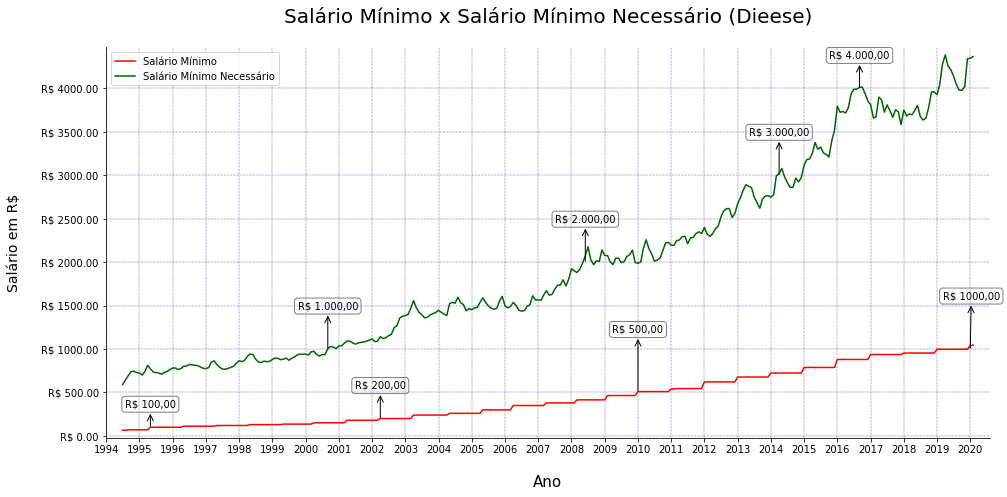

In [21]:
# plotar gráfico
fig, ax = plt.subplots(figsize=(14,7))

# Data
ax.plot(dieese_dados.index, dieese_dados['SM'], '-', color='red')
ax.plot(dieese_dados.index, dieese_dados['SMN'], '-', color='darkgreen')

# Y axis
plt.ylabel('Salário em R$', fontsize=14, labelpad=20)
formatter = ticker.FormatStrFormatter('R$ %1.2f')
ax.yaxis.set_major_formatter(formatter)
plt.yticks(np.arange(0, max(dieese_dados['SMN']), 500))

# X axis
plt.xlabel('Ano', fontsize=15, labelpad=20)
ax.xaxis.set_major_locator(mdates.YearLocator(1))

# Labels
arrow_props = arrowprops={'arrowstyle': '<-', 'shrinkA': 1, 'shrinkB': 1, 'lw':1.0,'mutation_scale': 15., 'color': 'black'}
bbox = dict(boxstyle="round", fc="none", ec="gray")

ax.annotate("R$ 100,00", xy=(sal_100, 100),  xycoords='data', bbox=bbox, xytext=(0, 20), textcoords='offset points', ha='center', arrowprops=arrow_props)
ax.annotate("R$ 200,00", xy=(sal_200, 200),  xycoords='data', bbox=bbox, xytext=(0, 30), textcoords='offset points', ha='center', arrowprops=arrow_props)
ax.annotate("R$ 500,00", xy=(sal_500, 500),  xycoords='data', bbox=bbox, xytext=(0, 60), textcoords='offset points', ha='center', arrowprops=arrow_props)
ax.annotate("R$ 1000,00", xy=(sal_1000, 1000),  xycoords='data', bbox=bbox, xytext=(1, 50), textcoords='offset points', ha='center', arrowprops=arrow_props)

ax.annotate("R$ 1.000,00", xy=(saln_1000, 1000),  xycoords='data', bbox=bbox, xytext=(0, 40), textcoords='offset points', ha='center', arrowprops=arrow_props)
ax.annotate("R$ 2.000,00", xy=(saln_2000, 2000),  xycoords='data', bbox=bbox, xytext=(0, 40), textcoords='offset points', ha='center', arrowprops=arrow_props)
ax.annotate("R$ 3.000,00", xy=(saln_3000, 3000),  xycoords='data', bbox=bbox, xytext=(0, 40), textcoords='offset points', ha='center', arrowprops=arrow_props)
ax.annotate("R$ 4.000,00", xy=(saln_4000, 4000),  xycoords='data', bbox=bbox, xytext=(0, 30), textcoords='offset points', ha='center', arrowprops=arrow_props)

# Title, legend, etc
ax.legend(loc='best')
ax.legend(('Salário Mínimo', 'Salário Mínimo Necessário'))

plt.title('Salário Mínimo x Salário Mínimo Necessário (Dieese)', fontsize=20,  y=1.05)
plt.margins(0.02)
plt.grid(linestyle='-.', linewidth=0.3, color='darkblue')
sns.despine()
plt.tight_layout()

fig.savefig('assets/salario_minimo.png', dpi=300)

---

Ao observar o gráfico, temos duas linhas que mostram a evolução do salário mínimo (SM) em vermelho e do Salário Mínimo Necessário (SMN) em verde, desde o ano de 1994 até 2020.

A linha do SM cresce bem timidamente, passando dos `R$100,00` em 1995, chegando aos `R$200,00` apenas 7 anos depois, em 2002. Chega nos `R$500,00` em 2010, para 10 anos depois chegar nos `R$1.000,00`.

O SMN começa com uma diferença de mais de `R$500,00`, e vai aumentando conforme o tempo, porém aumenta de forma bem mais vigorosa do que o SM. Esse crescimento se acentua a partir de 2002, atinge os `R$2.000,00` em 2008, 6 anos depois atinge os `R$3.000,00` e apenas dois anos depois, em 2016, atinge os `R$4.000,00`. Ao final, a diferença entre os salários é mais do que 300%!

---

#### Calcular a diferença

Vamos deixar mais claro as diferenças entre os dois salários.

In [22]:
dieese_dados['SM_DIFF'] = dieese_dados['SMN'] - dieese_dados['SM']
dieese_dados['SM_DIFF_PORC'] = np.round((dieese_dados['SMN'] / dieese_dados['SM']) * 100, 2)

In [23]:
dieese_dados.head(10)

,MES_NOME,SM,SMN,SM_DIFF,SM_DIFF_PORC
ANO_MES,,,,,
2020-02-01,Fevereiro,1045.0,4366.51,3321.51,417.85
2020-01-01,Janeiro,1039.0,4347.61,3308.61,418.44
2019-12-01,Dezembro,998.0,4342.57,3344.57,435.13
2019-11-01,Novembro,998.0,4021.39,3023.39,402.94
2019-10-01,Outubro,998.0,3978.63,2980.63,398.66
2019-09-01,Setembro,998.0,3980.82,2982.82,398.88
2019-08-01,Agosto,998.0,4044.58,3046.58,405.27
2019-07-01,Julho,998.0,4143.55,3145.55,415.19
2019-06-01,Junho,998.0,4214.62,3216.62,422.31


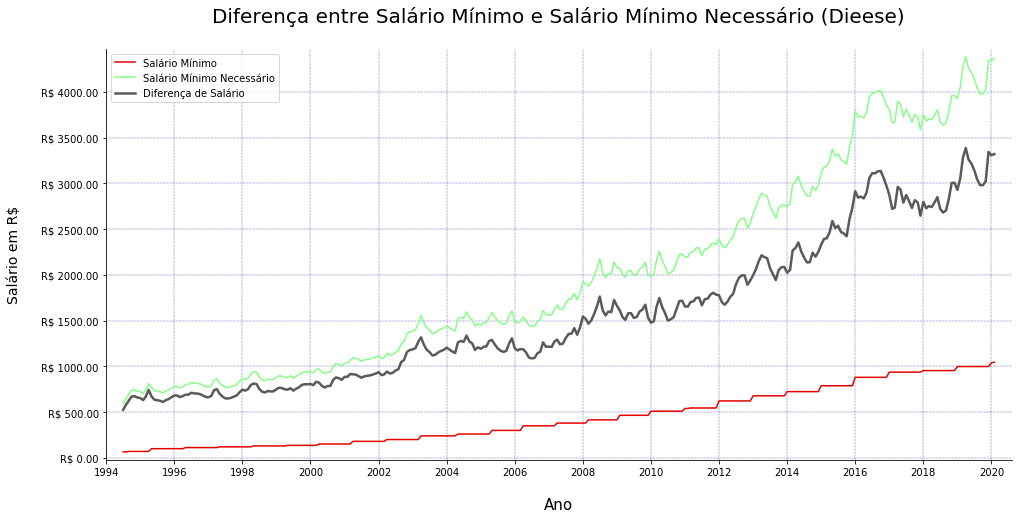

In [24]:
# plotar gráfico
fig, ax = plt.subplots(figsize=(14,7))

# Data
ax.plot(dieese_dados.index, dieese_dados['SM'], '-', color='#e60000')
ax.plot(dieese_dados.index, dieese_dados['SMN'], '-', color='#85ff85')
ax.plot(dieese_dados.index, dieese_dados['SM_DIFF'], '-', color='#5a5a5a', linewidth=2.5)

# Y axis
plt.ylabel('Salário em R$', fontsize=14, labelpad=20)
formatter = ticker.FormatStrFormatter('R$ %1.2f')
ax.yaxis.set_major_formatter(formatter)
plt.yticks(np.arange(0, max(dieese_dados['SMN']), 500))

# X axis
plt.xlabel('Ano', fontsize=15, labelpad=20)
ax.xaxis.set_major_locator(mdates.YearLocator(2))

# Title, legend, etc
ax.legend(loc='best')
ax.legend(('Salário Mínimo', 'Salário Mínimo Necessário', 'Diferença de Salário'))

plt.title('Diferença entre Salário Mínimo e Salário Mínimo Necessário (Dieese)', fontsize=20,  y=1.05)
plt.margins(0.02)
plt.grid(linestyle='-.', linewidth=0.3, color='darkblue')
sns.despine()
plt.tight_layout(pad=0)

fig.savefig('assets/salario_minimo_diff.png', dpi=300)

---

Nesse gráfico apenas foi adicionado mais uma linha para mostrar a diferença bruta entre os dois salários. Ela passa de `R$ 1.000,00` em 2002, passa de `R$ 2.000,00` em 2013, e de `R$ 3.000,00` em 2016. Neste gráfico dá para perceber que a subtração do SM sobre o SMN causa pouco impacto neste último. A linha da diferença fica sempre próxima do SMN.

---

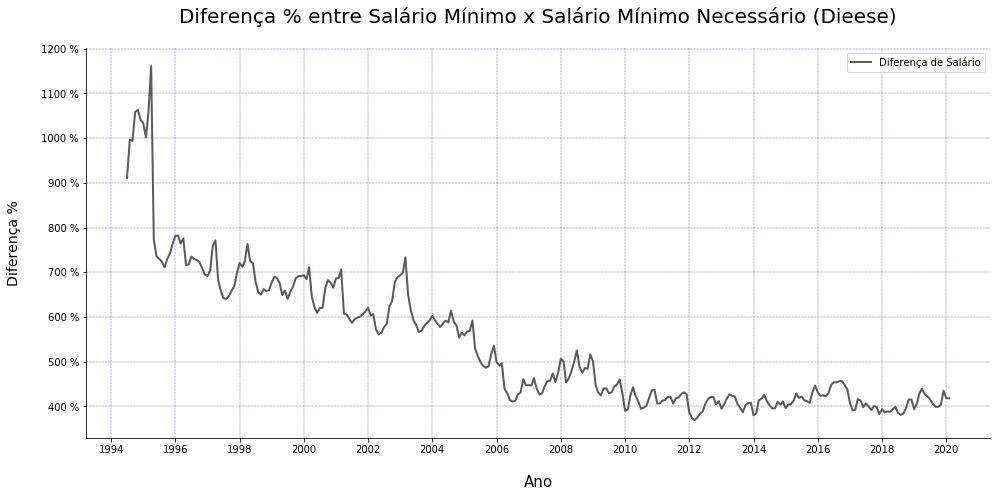

In [25]:
# plotar gráfico
fig, ax = plt.subplots(figsize=(14,7))

# Data
ax.plot(dieese_dados.index, dieese_dados['SM_DIFF_PORC'], '-', color='#5a5a5a', linewidth=2, label="Diferença de Salário")

# Y axis
plt.ylabel('Diferença %', fontsize=14, labelpad=20)
formatter = ticker.FormatStrFormatter('%1.f %%')
ax.yaxis.set_major_formatter(formatter)
#plt.yticks(np.arange(0, max(dieese_dados['SMN']), 500))

# X axis
plt.xlabel('Ano', fontsize=15, labelpad=20)
ax.xaxis.set_major_locator(mdates.YearLocator(2))

# Title, legend, etc
ax.legend(loc='best')

plt.title('Diferença % entre Salário Mínimo x Salário Mínimo Necessário (Dieese)', fontsize=20, y=1.05)
plt.grid(linestyle='-.', linewidth=0.3, color='darkblue')
sns.despine()
plt.tight_layout()

fig.savefig('assets/salario_minimo_diff_porc.png', dpi=300)

---

No próximo temos a diferença percentual (calculando a diferença entre SM e SMN, e dividindo pelo SMN), que começa de forma assustadora, batendo quase 1.200% (12 vezes)! Essa diferença percentual vai caindo até 2006, depois ela fica se equilibrando próxima da linha dos 400% (4 vezes).

---

Para calcular a evolução do salário, vamos inverter o dataframe pela data e calcular.

In [26]:
dieese_dados = dieese_dados.sort_index(axis=0, ascending=True)
dieese_dados.head(20)

,MES_NOME,SM,SMN,SM_DIFF,SM_DIFF_PORC
ANO_MES,,,,,
1994-07-01,Julho,64.79,590.33,525.54,911.14
1994-08-01,Agosto,64.79,645.53,580.74,996.34
1994-09-01,Setembro,70.00,695.64,625.64,993.77
1994-10-01,Outubro,70.00,740.83,670.83,1058.33
1994-11-01,Novembro,70.00,744.25,674.25,1063.21
1994-12-01,Dezembro,70.00,728.90,658.90,1041.29
1995-01-01,Janeiro,70.00,723.82,653.82,1034.03
1995-02-01,Fevereiro,70.00,701.14,631.14,1001.63
1995-03-01,Março,70.00,739.24,669.24,1056.06


In [27]:
dieese_dados['SM_PCT_CHANGE'] = dieese_dados['SM'].pct_change(fill_method ='ffill')
dieese_dados['SMN_PCT_CHANGE'] = dieese_dados['SMN'].pct_change(fill_method ='ffill')

In [28]:
pd.set_option('mode.chained_assignment', None)
dieese_dados_diff = dieese_dados[dieese_dados['SM_PCT_CHANGE'] > 0]

In [29]:
dieese_dados_diff['SMN_PCT_CHANGE'] = dieese_dados_diff['SMN_PCT_CHANGE'] * 100
dieese_dados_diff['SM_PCT_CHANGE'] = dieese_dados_diff['SM_PCT_CHANGE'] * 100

In [43]:
dieese_dados_diff_year_group = dieese_dados_diff.groupby(dieese_dados_diff.index.year).sum()
dieese_dados_diff_year_group.head()

,SM,SMN,SM_DIFF,SM_DIFF_PORC,SM_PCT_CHANGE,SMN_PCT_CHANGE
ANO_MES,,,,,,
1994,70.0,695.64,625.64,993.77,8.041364,7.762614
1995,100.0,773.18,673.18,773.18,42.857143,-4.872167
1996,112.0,801.95,689.95,716.03,12.000000,3.442716
1997,120.0,820.86,700.86,684.05,7.142857,-4.961156
1998,130.0,942.09,812.09,724.68,8.333333,2.814580


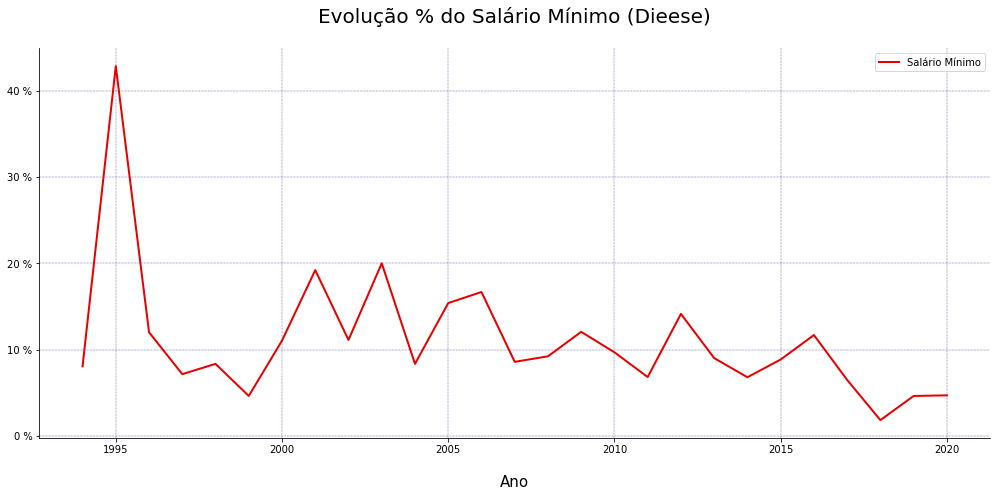

In [41]:
# plotar gráfico
fig, ax = plt.subplots(figsize=(14,7))

# Data
ax.plot(dieese_dados_diff_year_group.index, dieese_dados_diff_year_group['SM_PCT_CHANGE'], '-', color='#e60000', linewidth=2, label="Salário Mínimo")

# Y axis
plt.ylabel('', fontsize=14, labelpad=20)
formatter = ticker.FormatStrFormatter('%1.f %%')
ax.yaxis.set_major_formatter(formatter)

# X axis
plt.xlabel('Ano', fontsize=15, labelpad=20)

# Title, legend, etc
ax.legend(loc='best')

plt.title('Evolução % do Salário Mínimo (Dieese)', fontsize=20, y=1.05)
plt.grid(linestyle='-.', linewidth=0.3, color='darkblue')
sns.despine()
plt.tight_layout()

fig.savefig('assets/salario_minimo_diff_porc_evolucao.png', dpi=300)

---

O maior aumento se deu em 1995, que foi um "salto" de `R$70,00` para `R$100,00`, que representou cerca de 42% de aumento. Desde então nenhum aumento passou dos 20% e depois de 2009 só ultrapassou a faixa dos 10% em 2012 e 2016. O pior ano foi o de 2018, com 1,8%, um feito do governo Temer.

---